# BigMart Sales Data Exploration

## Import lib

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
print("The modules being imported")

The modules being imported


In [2]:
# Import Dataset

df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace = True)

In [7]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [8]:
#check null value

df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1. For missing data, categorical data we can impute with the mode
2. For numerical data, mean or median can be imputed

In [9]:
fig = px.box(df,y='Item_Weight')
fig.show()

In [10]:
# let's use the mean to impute as based on the above chart, we are clear of outliers

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

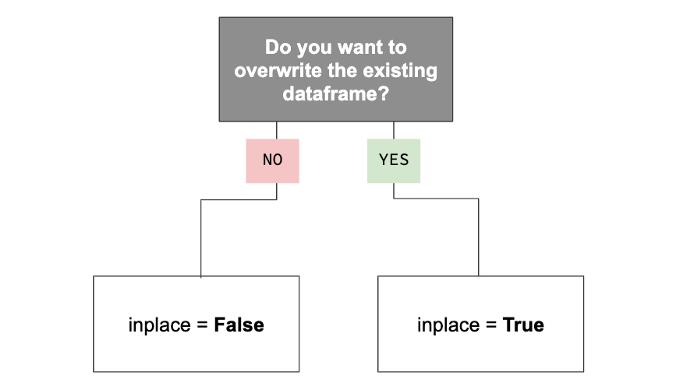

In [12]:
# recheck if we have more null at this column

df['Item_Weight'].isnull().sum()

0

In [13]:
#impute categorical data with its mode

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df['Outlet_Size'].isnull().sum()

0

In [14]:
# Outlet Type vs Sales

outlet_type_sales = df.groupby("Outlet_Type")[['Item_Outlet_Sales']].sum()
pd.set_option('display.float_format',lambda x: '%.3f' % x) #converting from scientific notation to numerical format
outlet_type_sales.sort_values(by=['Item_Outlet_Sales'],ascending=False)

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type1,12917342.263
Supermarket Type3,3453926.051
Supermarket Type2,1851822.830
Grocery Store,368034.266


In [18]:
# visualize it

data = df.groupby("Outlet_Type")[['Item_Outlet_Sales']].sum().sort_values(by=['Item_Outlet_Sales'],ascending=False).reset_index()
px.bar(data, x='Outlet_Type', y='Item_Outlet_Sales',color= 'Outlet_Type',color_discrete_sequence=px.colors.qualitative.Plotly)

In [17]:
fig = px.colors.qualitative.swatches()
fig.show()